安装 mtcc

In [ ]:
!sudo pip install mtcnn
!sudo pip show mtcnn

# confirm mtcnn was installed correctly
import mtcnn
# print version
print(mtcnn.__version__)

下载需要被检测图片

In [ ]:
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/test1.jpg
!wget https://machinelearningmastery.com/wp-content/uploads/2019/03/test2.jpg

检测人脸，绘制特征点

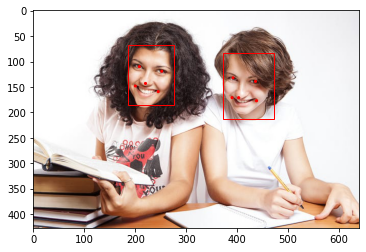

In [3]:
# face detection with mtcnn on a photograph
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw an image with detected objects
def draw_image_with_boxes(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot the image
	pyplot.imshow(data)
	# get the context for drawing boxes
	ax = pyplot.gca()
	# plot each box
	for result in result_list:
		# get coordinates
		x, y, width, height = result['box']
		# create the shape
		rect = Rectangle((x, y), width, height, fill=False, color='red')
		# draw the box
		ax.add_patch(rect)
		# draw the dots
		for key, value in result['keypoints'].items():
			# create and draw dot
			dot = Circle(value, radius=2, color='red')
			ax.add_patch(dot)
	# show the plot
	pyplot.show()
 
filename = 'test1.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_image_with_boxes(filename, faces)

扣取人脸

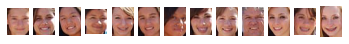

In [4]:
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from matplotlib.patches import Circle
from mtcnn.mtcnn import MTCNN
 
# draw each face separately
def draw_faces(filename, result_list):
	# load the image
	data = pyplot.imread(filename)
	# plot each face as a subplot
	for i in range(len(result_list)):
		# get coordinates
		x1, y1, width, height = result_list[i]['box']
		x2, y2 = x1 + width, y1 + height
		# define subplot
		pyplot.subplot(1, len(result_list), i+1)
		pyplot.axis('off')
		# plot face
		pyplot.imshow(data[y1:y2, x1:x2])
	# show the plot
	pyplot.show()
 
filename = 'test2.jpg'
# load image from file
pixels = pyplot.imread(filename)
# create the detector, using default weights
detector = MTCNN()
# detect faces in the image
faces = detector.detect_faces(pixels)
# display faces on the original image
draw_faces(filename, faces)